In [1]:
import os

In [2]:
# Config.py file

min_spectral_clusters=2,
max_spectral_clusters=100,
sampling_rate_sr = 16000
audio_rate=44100
audio_normalize=False
audio_autoplay=True

In [3]:
# !git clone https://github.com/resemble-ai/Resemblyzer.git
%cd Resemblyzer

c:\Users\GIRIRAJ ROY\Desktop\Diarization\Resemblyzer


In [4]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is AE71-C916

 Directory of c:\Users\GIRIRAJ ROY\Desktop\Diarization\Resemblyzer

10-04-2023  23:32    <DIR>          .
09-04-2023  16:38    <DIR>          ..
04-04-2023  10:14             1,537 .gitignore
10-04-2023  23:32    <DIR>          __pycache__
04-04-2023  10:14    <DIR>          audio_data
04-04-2023  10:14             6,994 demo_utils.py
04-04-2023  10:14             4,418 demo01_similarity.py
10-04-2023  23:37             2,134 demo02_diarization.py
04-04-2023  10:14             1,294 demo03_projection.py
04-04-2023  10:14             2,989 demo04_clustering.py
04-04-2023  10:14             2,928 demo05_fake_speech_detection.py
04-04-2023  10:14            10,948 LICENSE
04-04-2023  10:14    <DIR>          plots
04-04-2023  10:14             5,107 README.md
04-04-2023  10:14               136 requirements_demos.txt
04-04-2023  10:14                86 requirements_package.txt
05-04-2023  01:56    <DIR>          resembly

In [5]:
%pip install -r requirements_package.txt

Note: you may need to restart the kernel to use updated packages.


In [6]:
# %cd Resemblyzer
%cd C:/Users/GIRIRAJ ROY/Desktop/Diarization/Resemblyzer/

C:\Users\GIRIRAJ ROY\Desktop\Diarization\Resemblyzer


In [7]:
%pip install -r requirements_demos.txt

Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install -e .

Obtaining file:///C:/Users/GIRIRAJ%20ROY/Desktop/Diarization/Resemblyzer
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: Resemblyzer
    Found existing installation: Resemblyzer 0.1.1.dev0
    Uninstalling Resemblyzer-0.1.1.dev0:
      Successfully uninstalled Resemblyzer-0.1.1.dev0
  Running setup.py develop for Resemblyzer
Note: you may need to restart the kernel to use updated packages.


In [9]:
# Dataloader file

from resemblyzer import preprocess_wav, VoiceEncoder
from pathlib import Path

#give the file path to your audio file
audio_file='voice.wav'
audio_file_path = f'C:/Users/GIRIRAJ ROY/Desktop/Diarization/Audio/{audio_file}'
# C:\Users\GIRIRAJ ROY\Desktop\Dummy\Audio\audio_file.wav
# C:/Users/GIRIRAJ ROY/Desktop/Dummy/Audio/audio_file.wav
wav_fpath = Path(audio_file_path)

wav = preprocess_wav(wav_fpath)  #preprocessing wav file
encoder = VoiceEncoder("cpu")
_, cont_embeds, wav_splits = encoder.embed_utterance(wav, return_partials=True, rate=16)
print(cont_embeds.shape)

Loaded the voice encoder model on cpu in 0.01 seconds.
(1091, 256)


In [10]:
wav.shape

(1071360,)

In [11]:
cont_embeds.shape


(1091, 256)

In [12]:
wav_splits[2]

slice(1920, 27520, None)

#Note:
Sometimes the module might throw an error when you try to use an audio file having file extension different from wav, like mp3. In this case, you might need to convert your mp3 file to wav before using. You can use the below script (you will need to install pydub first)

In [13]:

# from pydub import AudioSegment

# def mp3_to_wav(audio_file_path):
#     sound = AudioSegment.from_mp3(audio_file_path)
#     audio_file_path = audio_file_path.split('.')[0] + '.wav'
#     sound.export(audio_file_path, format="wav")
#     return audio_file_path

# audio_file_path = mp3_to_wav(audio_file_path)


In [14]:
%pip install spectralcluster

Note: you may need to restart the kernel to use updated packages.


In [15]:
from spectralcluster import SpectralClusterer

clusterer = SpectralClusterer(
    min_clusters=2,
    max_clusters=100,
    )

labels = clusterer.predict(cont_embeds)

c:\Users\GIRIRAJ ROY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
labels.shape

(1091,)

In [17]:
import numpy as np
np.unique(labels)


array([0, 1], dtype=int64)

In [18]:
def create_labelling(labels,wav_splits):
    from resemblyzer import sampling_rate
    times = [((s.start + s.stop) / 2) / sampling_rate for s in wav_splits]
    labelling = []
    start_time = 0

    for i,time in enumerate(times):
        if i>0 and labels[i]!=labels[i-1]:
            temp = [str(labels[i-1]),start_time,time]
            labelling.append(tuple(temp))
            start_time = time
        if i==len(times)-1:
            temp = [str(labels[i]),start_time,time]
            labelling.append(tuple(temp))

    return labelling
  
labelling = create_labelling(labels,wav_splits)

In [19]:
labelling

[('1', 0, 5.24),
 ('0', 5.24, 13.64),
 ('1', 13.64, 15.14),
 ('0', 15.14, 28.4),
 ('1', 28.4, 29.66),
 ('0', 29.66, 40.34),
 ('1', 40.34, 47.96),
 ('0', 47.96, 48.32),
 ('1', 48.32, 56.06),
 ('0', 56.06, 61.64),
 ('1', 61.64, 61.7),
 ('0', 61.7, 66.2)]

In [20]:
type(labelling[0][2])

numpy.float64

In [21]:
len(labelling)

12

In [22]:
%cd C:/Users/GIRIRAJ ROY/Desktop/Diarization/Audio

C:\Users\GIRIRAJ ROY\Desktop\Diarization\Audio


In [23]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is AE71-C916

 Directory of C:\Users\GIRIRAJ ROY\Desktop\Diarization\Audio

10-04-2023  18:05    <DIR>          .
09-04-2023  16:38    <DIR>          ..
10-04-2023  18:54           209,644 1.wav
10-04-2023  18:54           223,244 10.wav
10-04-2023  18:54             2,444 11.wav
10-04-2023  18:54           180,044 12.wav
10-04-2023  18:54           336,044 2.wav
10-04-2023  18:54            60,044 3.wav
10-04-2023  18:54           530,444 4.wav
10-04-2023  18:54            50,444 5.wav
10-04-2023  18:54           427,244 6.wav
10-04-2023  18:54           304,844 7.wav
10-04-2023  18:54            14,444 8.wav
10-04-2023  18:54           309,644 9.wav
05-04-2023  13:29        37,762,742 audio_clear.wav
05-04-2023  13:26         3,249,924 harvard.wav
05-04-2023  03:12         1,850,496 mc22.wav
05-04-2023  11:31        15,946,714 tryst.wav
05-04-2023  02:49         4,684,844 voice.wav
              17 File(s)     66,143,248 bytes
 

In [24]:
# !rm -rf Audio/*

In [25]:
# TODO THIS CELL CAN BE DISCARDED


# import os
# from pydub import AudioSegment

# c = 1
# folder_name = 'C:/Users/GIRIRAJ ROY/Desktop/Dummy'
# for i in labelling:

#   # Using system to write the file
#   # os.system(f"ffmpeg -i mc22.wav -ss {i[1]} -t {i[2]} -acodec copy Audio/{c}.wav")
#   # os.system(f"ffmpeg -i 'mc22.wav' -acodec copy -ss {i[1]} -to {i[2]} 'Audio/{c}.wav'")
#   # os.system(f"ffmpeg -i 'mc22.wav' -c:av copy -ss {i[1]} -t {i[2]} 'Audio/{c}.wav'")


#   # The followingare the syntaxe for ffmpeg
#   # ffmpeg -i BIG_FILE -acodec copy -ss START_TIME -to END_TIME LITTLE_FILE
#   # ffmpeg -i input.mkv -c:av copy -ss 00:01:00 -t 10 output.mkv



#   # Operating through File Handling
#   file_path = os.path.join(folder_name, f'Audio/{c}.wav')
  
#   with open(file_path, 'w') as f:
#       f.write(f"ffmpeg -i mc22.wav -acodec copy -ss {i[1]} -to {i[2]} Audio/{c}.wav")
      
#       # f.write(f"ffmpeg -i mc22.wav -ss {i[1]} -t {i[2]} -acodec copy Audio/{c}.wav")

#       # print(f.read())
#       f.close()

#   print(f'done {c}')
#   c = c + 1

In [26]:
%pip install pydub

Note: you may need to restart the kernel to use updated packages.


In [27]:
#Segmentation

import os
from pydub import AudioSegment

c = 1
folder_name = 'C:/Users/GIRIRAJ ROY/Desktop/Diarization'

for i in labelling:
    t1 = i[1] * 1000 #Works in milliseconds
    t2 = i[2] * 1000
    newAudio = AudioSegment.from_wav(audio_file_path)
    newAudio = newAudio[t1:t2]
    newAudio.export(f'{c}.wav', format="wav")

    print(f'done {c}')
    c = c + 1 

done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9
done 10
done 11
done 12


c:\Users\GIRIRAJ ROY\AppData\Local\Programs\Python\Python310\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [28]:
# !rm -rf Audio/*

In [29]:
# %ffmpeg -i mc22.wav -f wav -bitexact -ss 0 -t 5.78 -acodec copy output.wav

In [30]:
%cd C:/Users/GIRIRAJ ROY/Desktop/Diarization/

C:\Users\GIRIRAJ ROY\Desktop\Diarization


In [31]:
len(os.listdir("Audio"))

17

In [32]:
%pip install SpeechRecognition
%pip install pydub


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [33]:
from IPython.display import Audio
Audio("C:/Users/GIRIRAJ ROY/Desktop/Diarization/Audio/1.wav", rate=44100, autoplay=True)


In [34]:
%cd Audio

C:\Users\GIRIRAJ ROY\Desktop\Diarization\Audio


In [35]:
%ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is AE71-C916

 Directory of C:\Users\GIRIRAJ ROY\Desktop\Diarization\Audio

10-04-2023  18:05    <DIR>          .
09-04-2023  16:38    <DIR>          ..
10-04-2023  23:39           209,644 1.wav
10-04-2023  23:39           223,244 10.wav
10-04-2023  23:39             2,444 11.wav
10-04-2023  23:39           180,044 12.wav
10-04-2023  23:39           336,044 2.wav
10-04-2023  23:39            60,044 3.wav
10-04-2023  23:39           530,444 4.wav
10-04-2023  23:39            50,444 5.wav
10-04-2023  23:39           427,244 6.wav
10-04-2023  23:39           304,844 7.wav
10-04-2023  23:39            14,444 8.wav
10-04-2023  23:39           309,644 9.wav
05-04-2023  13:29        37,762,742 audio_clear.wav
05-04-2023  13:26         3,249,924 harvard.wav
05-04-2023  03:12         1,850,496 mc22.wav
05-04-2023  11:31        15,946,714 tryst.wav
05-04-2023  02:49         4,684,844 voice.wav
              17 File(s)     66,143,248 bytes
 

In [36]:
# Executor file 

import speech_recognition as sr
# from playsound import playsound
import time
r = sr.Recognizer()



for i in range(len(labelling)):
  Audio(f"C:/Users/GIRIRAJ ROY/Desktop/Diarization/Audio/{i+1}.wav", rate=44100, normalize=False ,autoplay=True)
  time.sleep(1)

  hellow=sr.AudioFile(f'C:/Users/GIRIRAJ ROY/Desktop/Diarization/Audio/{i+1}.wav')
  with hellow as source:
      audio = r.record(source)
  try:
      s = r.recognize_google(audio)
      print(f"Speaker {labelling[i][0]}: {s}")
  except Exception as e:
    #   print("Exception: "+str(e))
    continue



Speaker 0: life I am with my friends
Speaker 0: and of some
Speaker 1: Alliance
Speaker 0: smiley facing


In [37]:
# Evaluation file
import IPython
import matplotlib.pyplot as plt
import numpy as np
import librosa

def play_audio(name):
  an4_audio = name
  sr = 16000
  signal, sr = librosa.load(an4_audio,sr=sr) 

  fig,ax = plt.subplots(1,1)
  fig.set_figwidth(20)
  fig.set_figheight(2)
  plt.plot(np.arange(len(signal)),signal,'gray')
  fig.suptitle('Reference merged an4 audio', fontsize=16)
  plt.xlabel('time (secs)', fontsize=18)
  ax.margins(x=0)
  plt.ylabel('signal strength', fontsize=16);
  a,_ = plt.xticks();plt.xticks(a,a/sr);

  IPython.display.Audio(an4_audio,autoplay=True)

In [38]:
%ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is AE71-C916

 Directory of C:\Users\GIRIRAJ ROY\Desktop\Diarization\Audio

10-04-2023  18:05    <DIR>          .
09-04-2023  16:38    <DIR>          ..
10-04-2023  23:39           209,644 1.wav
10-04-2023  23:39           223,244 10.wav
10-04-2023  23:39             2,444 11.wav
10-04-2023  23:39           180,044 12.wav
10-04-2023  23:39           336,044 2.wav
10-04-2023  23:39            60,044 3.wav
10-04-2023  23:39           530,444 4.wav
10-04-2023  23:39            50,444 5.wav
10-04-2023  23:39           427,244 6.wav
10-04-2023  23:39           304,844 7.wav
10-04-2023  23:39            14,444 8.wav
10-04-2023  23:39           309,644 9.wav
05-04-2023  13:29        37,762,742 audio_clear.wav
05-04-2023  13:26         3,249,924 harvard.wav
05-04-2023  03:12         1,850,496 mc22.wav
05-04-2023  11:31        15,946,714 tryst.wav
05-04-2023  02:49         4,684,844 voice.wav
              17 File(s)     66,143,248 bytes
 

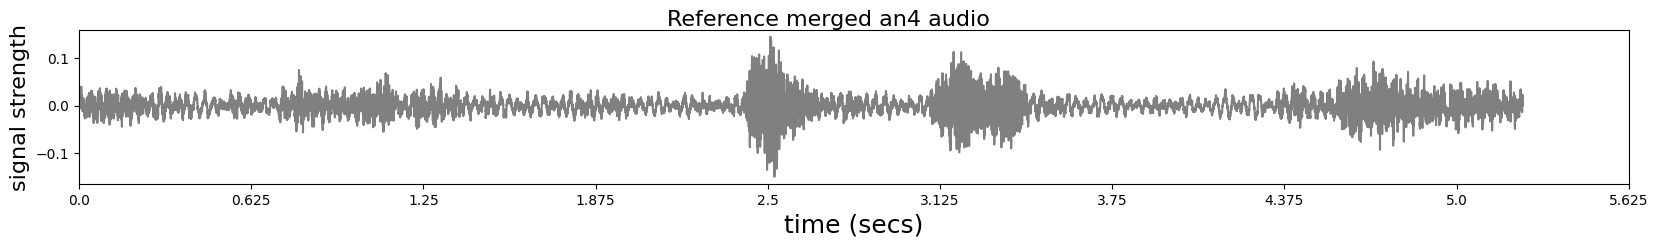

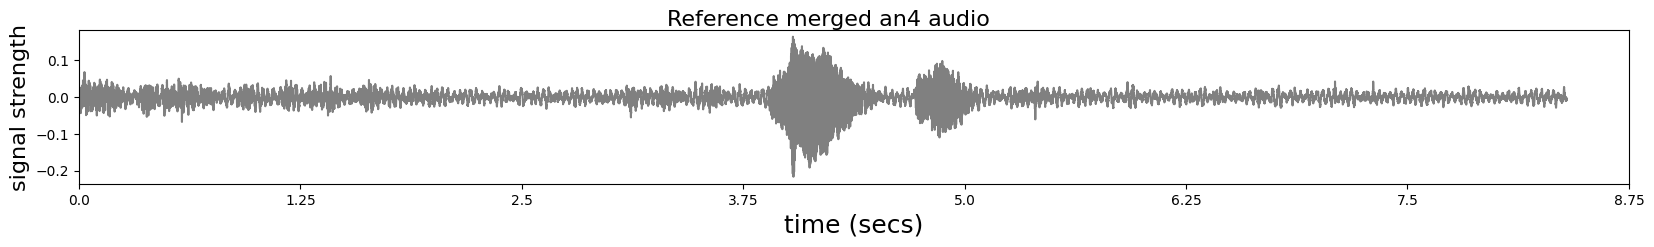

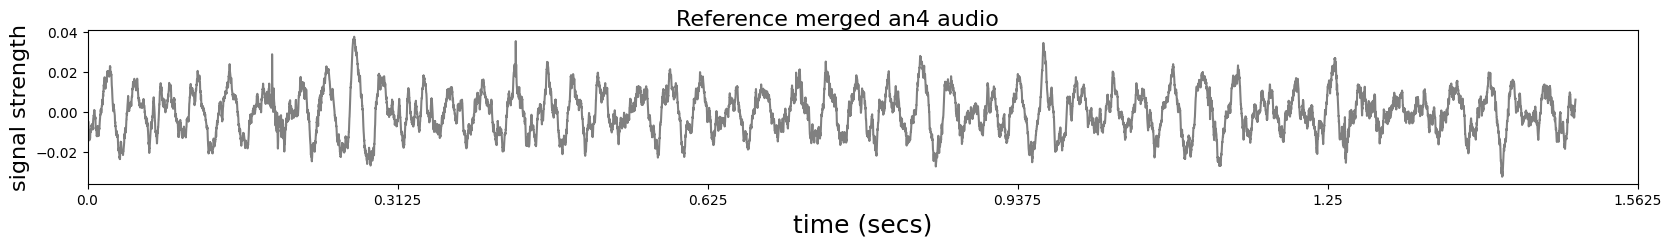

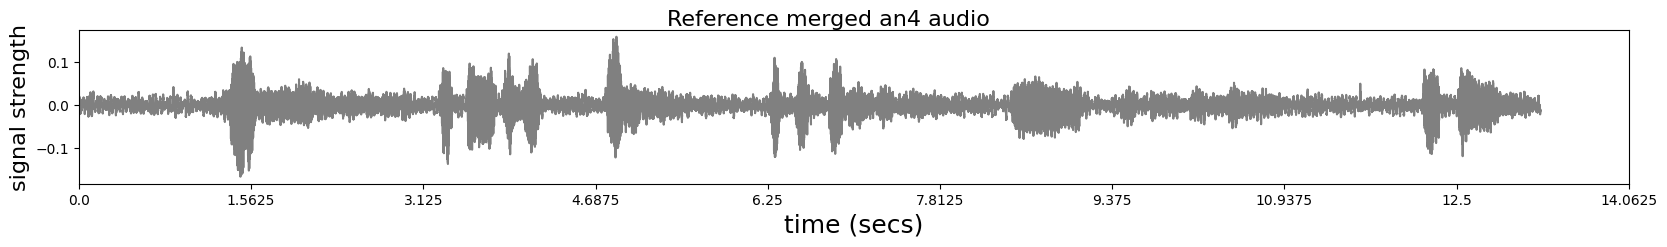

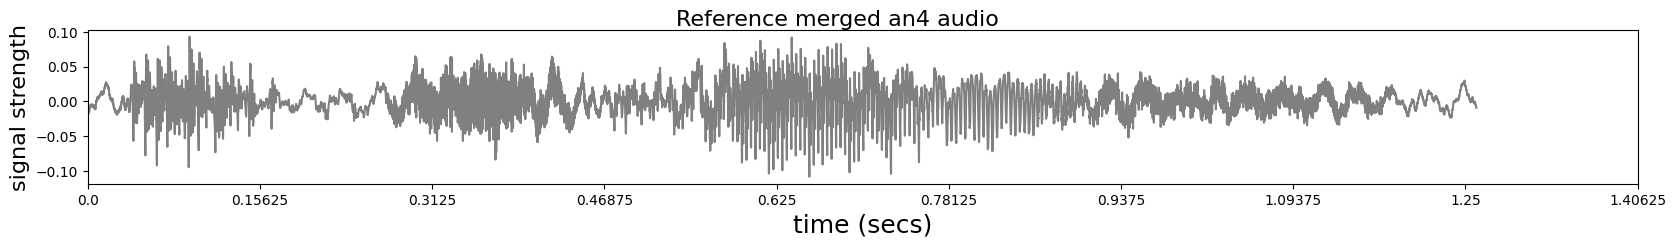

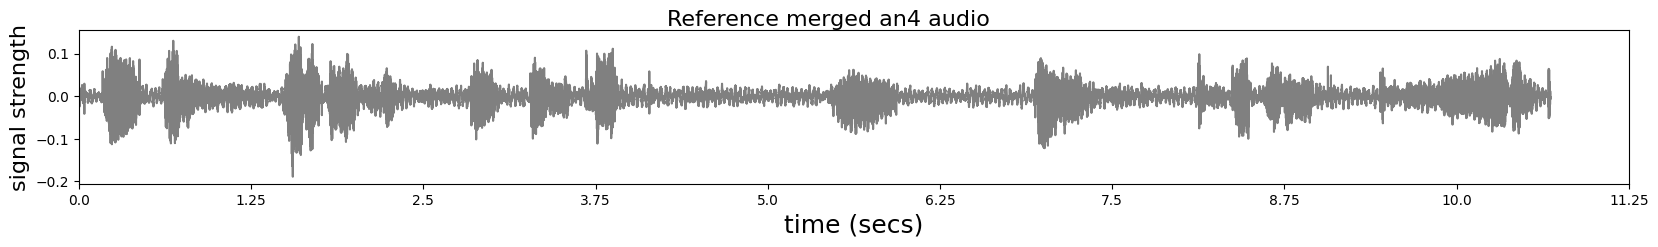

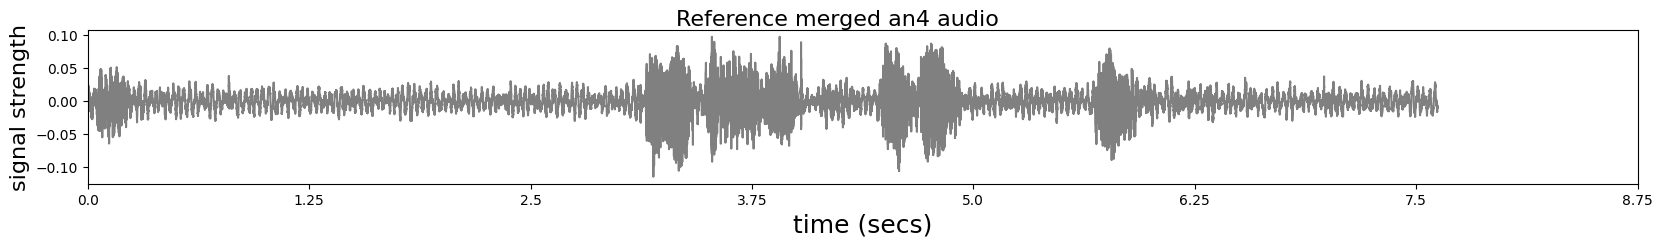

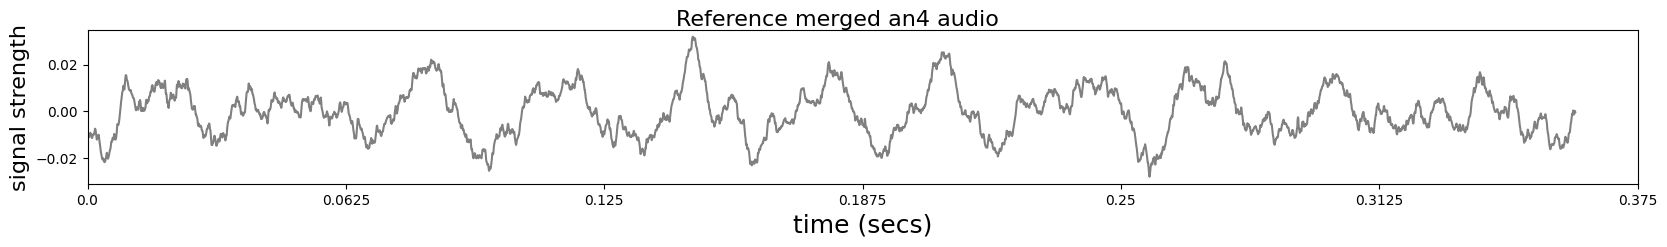

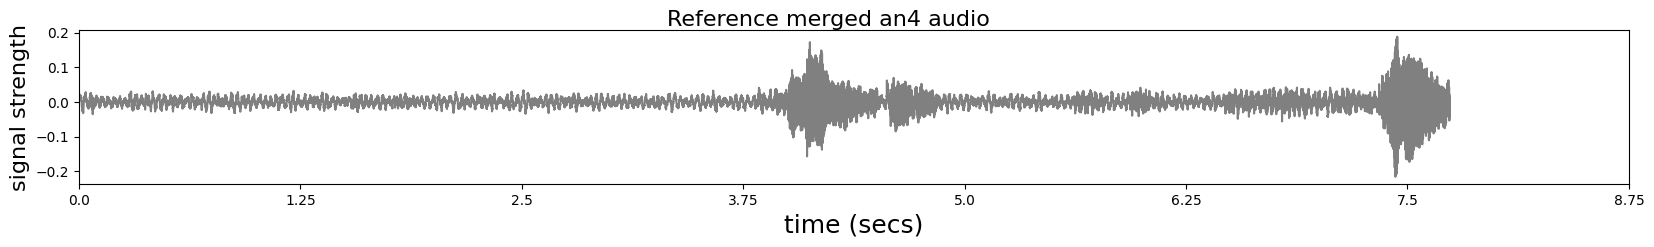

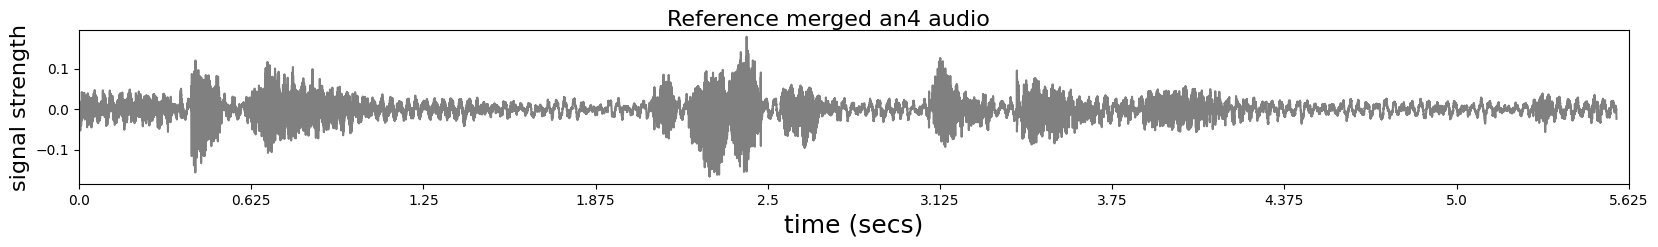

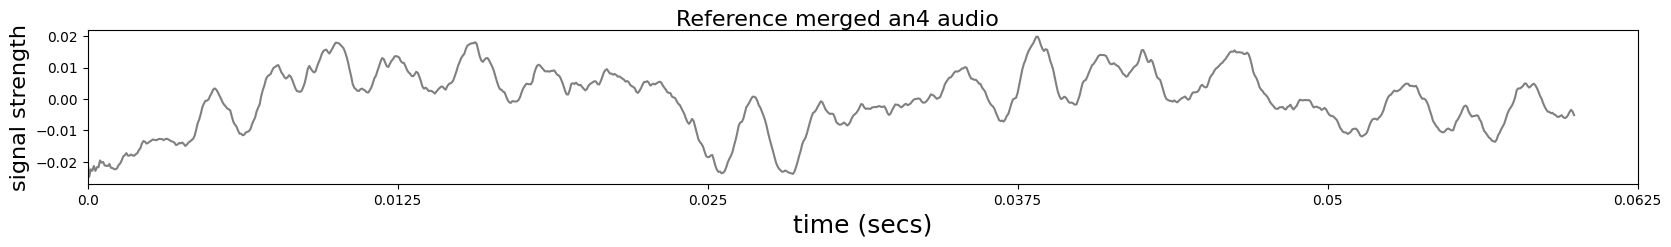

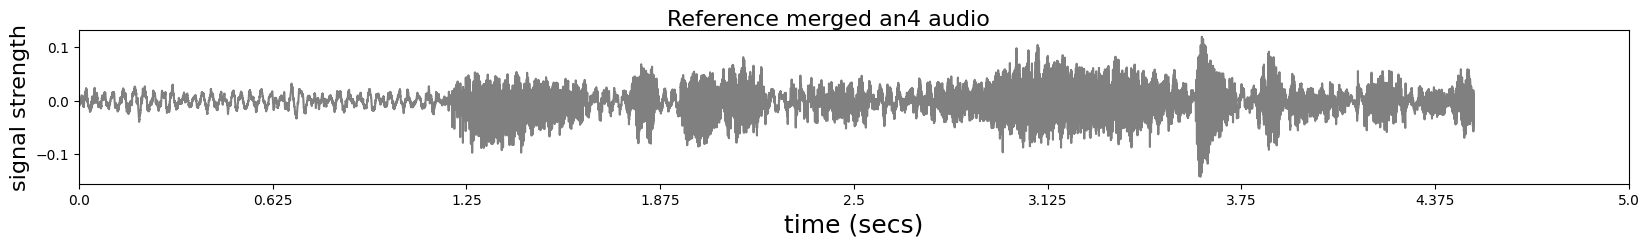

In [39]:
for i in range(1,c):
  play_audio(f"C:/Users/GIRIRAJ ROY/Desktop/Diarization/Audio/{i}.wav")